In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
import plotly.express as px

In [3]:
# pip install plotly==4.10.0

In [4]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData

In [27]:
plot_dt_long = pd.melt(perfomances_dt4, id_vars=['policy_name','policy_val', 'NMS'], value_vars=['L_change', 'P', 'G', 'net_balance'])
plot_dt_long['policy_name'][plot_dt_long['policy_name'] == 'cut'] = 'reduction'
plot_dt_long['policy_NMS'] = plot_dt_long['policy_name']+'_'+ plot_dt_long['NMS']
plot_dt_long

/opt/anaconda3/envs/GEOANN/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,policy_name,policy_val,NMS,variable,value,policy_NMS
0,ratio,5.0,dynamic,L_change,-8.900000,ratio_dynamic
1,ratio,6.0,dynamic,L_change,-12.400000,ratio_dynamic
2,ratio,7.0,dynamic,L_change,-15.500000,ratio_dynamic
3,ratio,8.0,dynamic,L_change,-17.900000,ratio_dynamic
4,ratio,9.0,dynamic,L_change,-20.300000,ratio_dynamic
...,...,...,...,...,...,...
403,reduction,23.0,static,net_balance,-34.659269,reduction_static
404,reduction,24.0,static,net_balance,-50.965247,reduction_static
405,reduction,25.0,static,net_balance,-50.965247,reduction_static
406,reduction,26.0,static,net_balance,-53.105164,reduction_static


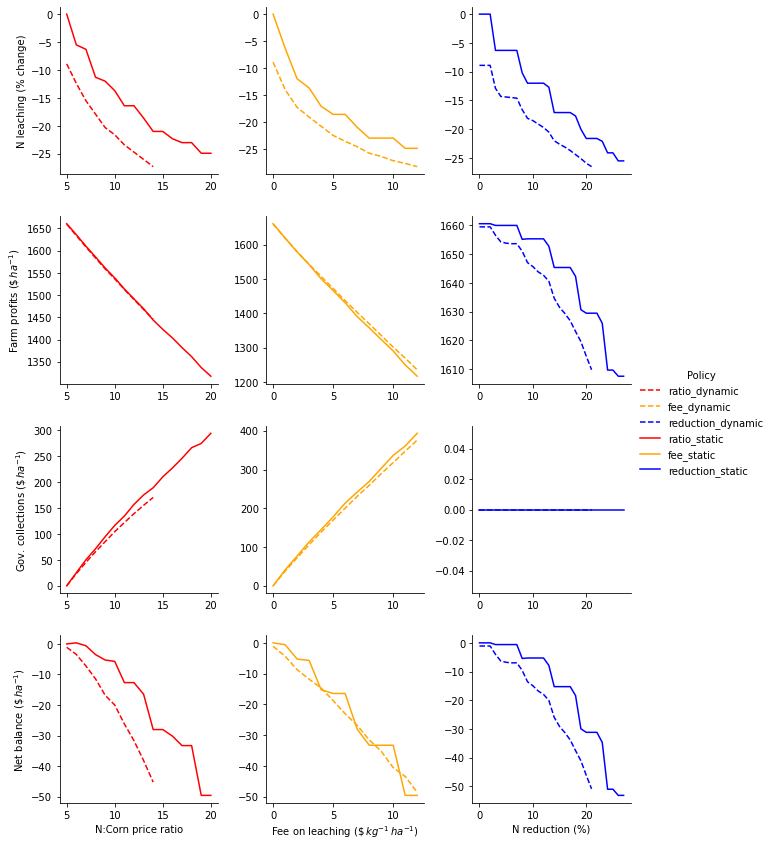

In [30]:
# importing packages 
import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['green', 'green'], 'linestyle' : ["-","--"]}
kw = {'color': ['red', 'orange', 'blue', 'red', 'orange', 'blue'], 'linestyle' : ["--","--","--","-","-","-"]}

graph = seaborn.FacetGrid(plot_dt_long, row ='variable', col ='policy_name', hue ='policy_NMS', sharey = False, sharex = False, margin_titles=False, hue_kws=kw) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy')  

graph.axes[3,0].set_xlabel('N:Corn price ratio')
graph.axes[3,1].set_xlabel(r'Fee on leaching $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[3,2].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel('N leaching (% change)')
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
# show the object 
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"

graph.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"

graph.savefig(plot_file_name, dpi=300)
  
    
# https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid    
# This code is contributed by Deepanshu Rustagi.

In [7]:
plot_dt_long2 = plot_dt_long[plot_dt_long['NMS'] == 'static']
plot_dt_long2

,policy_name,policy_val,NMS,variable,value
45,ratio,5.0,static,L_change,0.000000
46,ratio,6.0,static,L_change,-5.500000
47,ratio,7.0,static,L_change,-6.300000
48,ratio,8.0,static,L_change,-11.300000
49,ratio,9.0,static,L_change,-12.000000
...,...,...,...,...,...
403,cut,23.0,static,net_balance,-34.659269
404,cut,24.0,static,net_balance,-50.965247
405,cut,25.0,static,net_balance,-50.965247
406,cut,26.0,static,net_balance,-53.105164


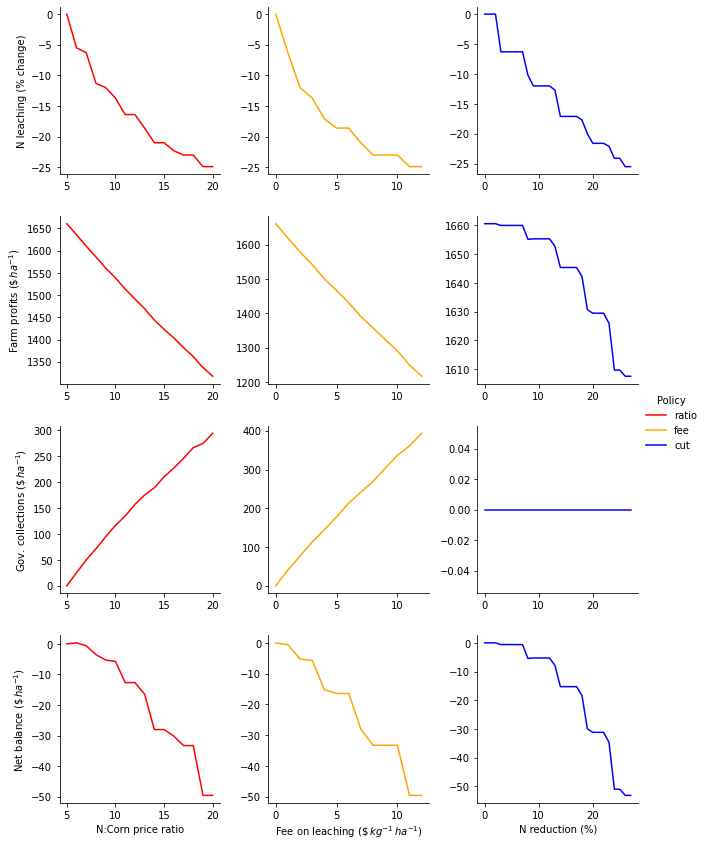

In [21]:
# No DYNAMIC 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['red', 'orange', 'blue']}
graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue = 'policy_name',sharey = False, sharex = False, margin_titles=False, hue_kws=kw) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy') 
#graph.legend.texts[0].set_text("Whatever else")
graph.axes[3,0].set_xlabel('N:Corn price ratio')
graph.axes[3,1].set_xlabel(r'Fee on leaching $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[3,2].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel('N leaching (% change)')
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
# show the object 
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"

graph.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"

graph.savefig(plot_file_name, dpi=300)
  
    
# https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid    
# This code is contributed by Deepanshu Rustagi.

In [ ]:
import seaborn as sns

att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

#this surpresses the x- and y-labels on each axes of the bottom/leftmost column
# g.set_axis_labels('', '') 

# # overall ylabel
# g.fig.text(x=0, y=0.5, 
#            verticalalignment='center', #make sure it's aligned at center vertically
#            s='Alcohol % per volume', #this is the text in the ylabel
#            size=16, #customize the fontsize if you will
#            rotation=90) #vertical text

#overall xlabel
# g.fig.text(x=0.5, y=0, 
#            horizontalalignment='center', #make sure it's aligned at center horizontally
#            s='Density $g/cm^3$', #this is the text in the xlabel
#            size=16)

In [ ]:
df
